In [1]:
#Import the required libraries
import keras
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot  as plt
from PIL import Image

In [2]:
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split



# Split the data into training and testing sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Check the shapes of the resulting datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


170498071/170498071 [==============================] - 6s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing labels shape: (10000, 1)


In [3]:
#Set the image size to reresize all the images into (im_size x im_size x 3)
global im_size
im_size = 32
training_data = []

In [45]:
#Reshape the features to (n x im_size x im_size x 3)
import numpy as np
X_train = np.array(X_train).reshape(-1, im_size, im_size,3)
X_test = np.array(X_test).reshape(-1, im_size, im_size,3)

# Code

In [46]:
print("The shape of the training features is:",X_train[:3000].shape)
print("The shape of the testing features is:",X_test[:400].shape)

The shape of the training features is: (3000, 32, 32, 3)
The shape of the testing features is: (400, 32, 32, 3)


In [47]:
label_data = np.unique(y_train)
len(label_data)

10

In [48]:
#Impor the libraries for the NN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD,Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.utils import np_utils

In [50]:
#Build the NN Architechture
im_size = 32
model=Sequential()
model.add(Conv2D(64,(3,3), strides=1, input_shape=[im_size, im_size, 3], activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(AveragePooling2D(pool_size=(3,3)))


model.add(Conv2D(32,(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(3,3)))
model.add(AveragePooling2D(pool_size=(3,3)))


# model.add(Conv2D(32,(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(3,3)))
# model.add(AveragePooling2D(pool_size=(3,3)))


#Flat the extracted data
model.add(Flatten())

#Fully Connected NN
model.add(Dense(200,activation='relu'))
# model.add(Dropout(0.1))

model.add(Dense(200,activation='relu'))

model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(len(label_data), activation='softmax'))

In [51]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 average_pooling2d_3 (Averag  (None, 2, 2, 32)         0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 200)              

In [53]:
#Prepare the training data
X_train = np.asarray(X_train).astype('float32').reshape((-1,im_size,im_size,3))
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))

indices = np.random.permutation(X_train.shape[0])
# Shuffle both arrays using the indices
X_train = X_train[indices]
y_train = y_train[indices]

indices1 = np.random.permutation(X_test.shape[0])
# Shuffle both arrays using the indices
X_test = X_test[indices1]
y_test = y_test[indices1]



#Prepare the testing data
X_test = np.asarray(X_test).astype('float32').reshape((-1,im_size,im_size,3))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [56]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

file_path= "/content/drive/MyDrive/Colab Notebooks/Projects/001_Image_Classification/model3.h5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=file_path,
                                                               monitor='val_accuracy',
                                                               save_best_only=True)


history = model.fit(X_train[:1500], y_train[:1500], epochs = 10, callbacks = [model_checkpoint_callback], verbose = 1, validation_split = 0.4)
# history = model.fit(train_generator, epochs=25,validation_data = validation_generator, verbose = 1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
29/29 [==============================] - 2s 56ms/step - loss: 0.1148 - accuracy: 0.9667 - val_loss: 4.7366 - val_accuracy: 0.3700
Epoch 2/10
29/29 [==============================] - 1s 49ms/step - loss: 0.0358 - accuracy: 0.9911 - val_loss: 4.9139 - val_accuracy: 0.3833
Epoch 3/10
29/29 [==============================] - 2s 75ms/step - loss: 0.0184 - accuracy: 0.9978 - val_loss: 5.1859 - val_accuracy: 0.3717
Epoch 4/10
29/29 [==============================] - 2s 85ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 5.4165 - val_accuracy: 0.3783
Epoch 5/10
29/29 [==============================] - 2s 63ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 5.4270 - val_accuracy: 0.3633
Epoch 6/10
29/29 [==============================] - 1s 48ms/step - loss: 0.0049 - accuracy: 0.9978 - val_loss: 5.6899 - val_accuracy: 0.3633
Epoch 7/10
29/29 [=======

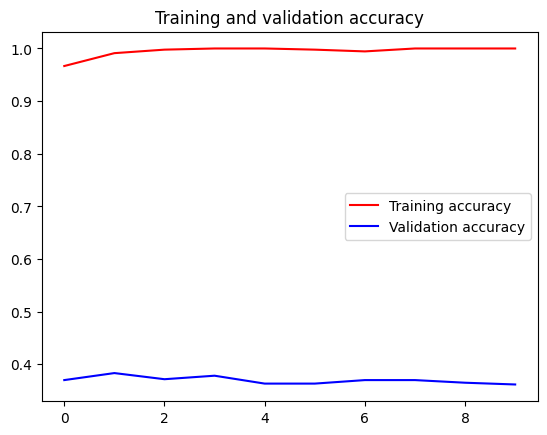

<Figure size 640x480 with 0 Axes>

In [57]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [58]:
from keras.models import load_model
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Navigate to the Drive directory where the model is located
%cd /content/drive/MyDrive/Colab Notebooks/Projects/001_Image Classification

# List files in the current directory
file_list = os.listdir('.')
print(file_list)

# Load the model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Projects/001_Image_Classification/model3.h5')

_,acc=model.evaluate(X_test[:300],y_test[:300])
print(acc*100)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Projects/001_Image Classification
['Data', '.ipynb_checkpoints', 'Database+', 'images', 'Image_classification_Traffic_signs_V5.py', 'requirements.txt', 'Image_classification_Traffic_signs_V5.ipynb', 'CNN_CIFAR10_Local.ipynb', 'model3.h5', 'CNN CIFAR10 - COLAB.ipynb']
10/10 [==============================] - 0s 13ms/step - loss: 4.6242 - accuracy: 0.3500
34.99999940395355


In [43]:
im_size = 32

def image_display(full_path = "path"):
    image = Image.open(full_path)
    image.thumbnail((100, 100))  # Adjust the size of the thumbnail
    plt.imshow(image)

def image_processing(full_path = "path"):
    image_display(full_path = full_path)
    im = cv2.imread(full_path)
    im = cv2.resize(im,(im_size, im_size))
    im = im/255.0

    return im

def model_pred(im_array):

    im_array = np.array(im_array).reshape(-1, im_size, im_size,3)

    pred=model.predict(im_array)
    pred = np.array(pred)
    pred = pred.reshape(-1,)
    idx = np.argmax(pred)
    print("\n-----------------------------------------------------\n")
    print("The index of the predicted class:",idx)
    class_ = label_data[idx]

    #The probabilty of other classes
    print("Predicted class: ",class_)

    # Calculate the sum of the values
    total = np.sum(pred)
    # Convert the values to percentages
    pred = (pred / total) * 100
    pred = pred.astype("int32")
    print("Probability of other classes: ", pred)
    return class_

1/1 [==============================] - 0s 27ms/step

-----------------------------------------------------

The index of the predicted class: 6
Predicted class:  6
Probability of other classes:  [ 7  8 11 11 12  9 13  9  7  7]


6

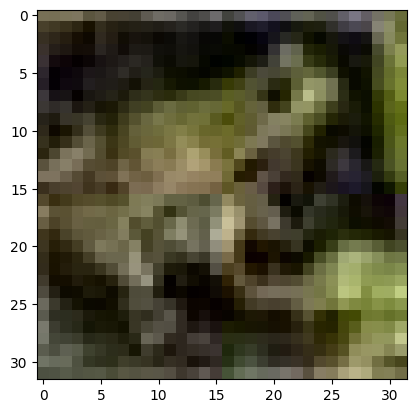

In [44]:
test = image_processing(full_path = '/content/drive/MyDrive/0123.jpg')
model_pred(test)

In [ ]:
from google.colab import drive
import os
import tensorflow as tf

# Mount your Google Drive
drive.mount('/content/drive')

# Navigate to the Drive directory where the model is located
%cd /content/drive/MyDrive/Colab Notebooks/Projects/001_Image Classification
# Replace 'path/to/model/directory' with the actual path to the directory where your model file is stored

# List files in the current directory
file_list = os.listdir('.')
print(file_list)

# Specify the path of the model file
#model_path = 'model.h5'  # Replace 'model.h5' with the actual filename

# Load the model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Projects/001_Image_Classification/model3.h5')

# Use the loaded model for inference or other tasks
# ...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Projects/001_Image Classification
['images_classification_V4_Traffic signs_modify.ipynb', 'images_classification-checkpoint.ipynb', 'images_classification_CIFAR.ipynb', 'images_classification_V4_Traffic signs.ipynb', 'model3.h5', 'Data', '.ipynb_checkpoints', 'Database+', 'images']


In [ ]:
import os
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from PIL import Image
import cv2
import numpy as np
import pandas as pd
from keras.models import load_model

im_size = 32


def image_display(full_path = "path"):
    image = Image.open(full_path)
    image.thumbnail((32, 32))  # Adjust the size of the thumbnail
    display(image)
def image_processing(full_path = "path"):
    image_display(full_path = full_path)
    im = cv2.imread(full_path)
    im = cv2.resize(im,(im_size, im_size))
    im = im/255.0

    return im

def model_pred(im_array):

    im_array = np.array(im_array).reshape(-1, im_size, im_size,3)

    pred=model.predict(im_array)
    #print(pred)
    pred = np.array(pred)
    pred = pred.reshape(-1,)
    idx = np.argmax(pred)
    print("\n-----------------------------------------------------\n")
    print("The index of the predicted class:",idx)
    class_ = label_data[idx]

    #The probabilty of other classes
    print("Predicted class: ",class_)

    # Calculate the sum of the values
    total = np.sum(pred)
    # Convert the values to percentages
    pred = (pred / total) * 100
    pred = pred.astype("int32")
    print("Probability of other classes: ", pred)

    display_data = pd.DataFrame([pred])
    display_data.columns = label_data

    display(display_data)

    return class_


# label_data = ['Left', 'Pedestrian', 'Right', 'Roundabout', 'Speed 100', 'Speed 120', 'Speed 60', 'Speed 80', 'Stop', 'Traffic light']
# im_size =100

In [ ]:
from google.colab import drive
from google.colab import files
from PIL import Image

# Mount your Google Drive
drive.mount('/content/drive')

# List files in the Drive directory
file_list = !ls '/content/drive/MyDrive'
print("Files in Google Drive:")
print(file_list)

# Prompt the user to select an image file
print("Select an image file from Google Drive:")
uploaded = files.upload()

# Extract the first uploaded file
image_path = list(uploaded.keys())[0]

# Process the image
image_array = image_processing(image_path)

# Use the image array for model prediction
prediction = model_pred(image_array)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in Google Drive:
[' 0018.jpg', ' 0123.jpg', ' a-all.arff.gsheet', "'Blank Quiz.gform'", "'Colab Notebooks'", "'Coursera Google.gsheet'", ' CustomerSurvey.gsheet', ' CV_ms.pdf', ' Documents', ' dsd.csv', "'Dynamic Dataset.gsheet'", "'Edutech days'", ' HistoricalSales.gsheet', "'June 2014 Invoices.gsheet'", "'Kitty Survey Feedback.gsheet'", ' MOE', "'Movie Data Starter Project.gsheet'", ' Photos', "'Retail Sales Data.gsheet'", ' Rjt0Mo9mQPq7dDKPZvD6Hg_e0ce4d25e0e84304b35c917678255af1_Monthly-Sales---Functions-101.xlsx', "'Sample Transaction Table.gsheet'", "'Spreadsheet Errors and Fixes Demo Sheets.gsheet'", "'University courses'", "'Untitled spreadsheet.gsheet'", "'wi3xBG41QGat8QRuNeBmXA_e59e3cf977ff49f1bb217abd8bb645f1_Population-Latin-and-Caribbean-Countries-2010-2019 (1).gsheet'", ' wi3xBG41QGat8QRuNeBmXA_e59e3cf977ff49f1bb217abd8bb645f1_Population-La

In [ ]:
# Process the image
image_array = image_processing("Data/Validation/Speed 80/Speed 80_1.jpg")

# Use the image array for model prediction
prediction = model_pred(image_array)

![image-2.png](attachment:image-2.png)

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image
import os
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from PIL import Image
import cv2
import numpy as np
import pandas as pd

from keras.models import load_model
label_data = ['Left', 'Pedestrian', 'Right', 'Roundabout', 'Speed 100', 'Speed 120', 'Speed 60', 'Speed 80', 'Stop', 'Traffic light']

model = load_model('model3.h5')

import tkinter as tk
from tkinter import filedialog
from PIL import Image
import numpy as np


# Function to handle button click event
def browse_image():
    # Open file dialog to select an image file
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.bmp")])
    # Check if a file was selected
    if file_path:


        # Process the image
        image_array = image_processing(file_path)

        # Use the image array for model prediction
        prediction = model_pred(image_array)

        # Display the prediction
        prediction_label.configure(text="Prediction: " + prediction)

# Create the main window
window = tk.Tk()
window.title("Image Prediction")

# Create a button to browse for an image
browse_button = tk.Button(window, text="Browse Image", command=browse_image)
browse_button.pack(pady=10)

# Create a label for displaying the prediction
prediction_label = tk.Label(window, text="Prediction: ")
prediction_label.pack(pady=10)

# Create a label for displaying the image (optional)
# image_label = tk.Label(window)
# image_label.pack(pady=10)

# Run the main window loop
window.mainloop()


# ![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image

class ImageBrowser:
    def __init__(self, root):
        self.root = root
        self.root.title("Image Browser")
        self.image_label = tk.Label(root)
        self.image_label.pack(padx=10, pady=10)
        self.current_image_index = 0
        self.images = []

        # Button to browse images
        browse_button = tk.Button(root, text="Browse", command=self.browse_images)
        browse_button.pack(padx=10, pady=5)

        # Button to display previous image
        prev_button = tk.Button(root, text="Previous", command=self.display_previous_image)
        prev_button.pack(padx=10, pady=5)

        # Button to display next image
        next_button = tk.Button(root, text="Next", command=self.display_next_image)
        next_button.pack(padx=10, pady=5)

    def browse_images(self):
        filetypes = (("Image files", "*.jpg;*.jpeg;*.png;*.gif"), ("All files", "*.*"))
        filenames = filedialog.askopenfilenames(title="Select Images", filetypes=filetypes)
        self.images = [Image.open(filename) for filename in filenames]
        if self.images:
            self.display_image(0)

    def display_image(self, index):
        image = self.images[index]
        image = image.resize((400, 400))
        photo = ImageTk.PhotoImage(image)
        self.image_label.configure(image=photo)
        self.image_label.image = photo
        self.current_image_index = index

    def display_previous_image(self):
        if self.current_image_index > 0:
            self.display_image(self.current_image_index - 1)

    def display_next_image(self):
        if self.current_image_index < len(self.images) - 1:
            self.display_image(self.current_image_index + 1)

# Create the Tkinter root window
root = tk.Tk()

# Create an instance of the ImageBrowser class
image_browser = ImageBrowser(root)

# Start the Tkinter event loop
root.mainloop()


In [ ]:
# Create an instance of Tkinter
root = Tk()
root.withdraw()  # Hide the root window

# Open the file dialog box
file_path = askopenfilename(filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.gif")])
full_path = os.path.abspath(file_path)

im = image_processing(full_path = full_path)
model_pred(im)



#print(pd.DataFrame(np.append(label_data,proba,axis=0)))
#['Left', 'Pedestrian', 'Right', 'Roundabout', 'Speed 100', 'Speed 120', 'Speed 60', 'Speed 80', 'Stop', 'Traffic light']

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

def browse_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        path_label.config(text=file_path)
        display_image(file_path)
    else:
        path_label.config(text="No file selected")
        image_label.config(image='')

def display_image(file_path):
    image = Image.open(file_path)
    image.thumbnail((400, 400))
    photo = ImageTk.PhotoImage(image)
    image_label.config(image=photo)
    image_label.image = photo

# Create the main window
window = tk.Tk()
window.title("Image Browser")

# Create a button to browse for an image
browse_button = tk.Button(window, text="Browse", command=browse_image)
browse_button.pack(pady=10)

# Create a label to display the selected file path
path_label = tk.Label(window, text="No file selected")
path_label.pack()

# Create a label to display the image
image_label = tk.Label(window)
image_label.pack()

# Run the main window event loop
window.mainloop()


In [ ]:
import os
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from PIL import Image

label_data = ['Left', 'Pedestrian', 'Right', 'Roundabout', 'Speed 100', 'Speed 120', 'Speed 60', 'Speed 80', 'Stop', 'Traffic light']
im_size =100

# Create an instance of Tkinter
root = Tk()
root.withdraw()  # Hide the root window

# Open the file dialog box
file_path = askopenfilename(filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.gif")])

# Check if a file was selected
if file_path:
    # Get the absolute path of the selected file
    full_path = os.path.abspath(file_path)

    # Print the selected image file path
    print("Selected image:", full_path)

    # Open and display the image thumbnail
    try:
        image = Image.open(full_path)
        image.thumbnail((1000, 1000))  # Adjust the size of the thumbnail
        image.show()
    except Exception as e:
        print("Error displaying image:", str(e))
else:
    print("No file selected.")




im = cv2.imread(full_path)
im = cv2.resize(im,(im_size, im_size))
im=im/255.0
im = np.array(im).reshape(-1, im_size, im_size,3)

pred=model.predict(im)
#print(pred)
pred = np.array(pred)
pred = pred.reshape(-1,)
idx = np.argmax(pred)
print("\n-----------------------------------------------------\n")
print("The index of the predicted class:",idx)
class_ = label_data[idx]

#The probabilty of other classes
print("Predicted class: ",class_)
# Calculate the sum of the values
total = np.sum(pred)

# Convert the values to percentages
pred = (pred / total) * 100
pred = pred.astype("int32")
print("Probability of other classes: ", pred)

display_data = pd.DataFrame([pred])
display_data.columns = label_data

display_data
#print(pd.DataFrame(np.append(label_data,proba,axis=0)))
#['Left', 'Pedestrian', 'Right', 'Roundabout', 'Speed 100', 'Speed 120', 'Speed 60', 'Speed 80', 'Stop', 'Traffic light']

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np
import pandas as pd
import os
import cv2
from keras.models import load_model


# label_data = ['Left', 'Pedestrian', 'Right', 'Roundabout', 'Speed 100', 'Speed 120', 'Speed 60', 'Speed 80', 'Stop', 'Traffic light']
# im_size =100

#load the trained model to classify the images
model = load_model('model3.h5')


#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global pred

    im = cv2.imread(file_path)
    im = cv2.resize(im,(im_size, im_size))
    #im = np.asarray(im).astype('float32').reshape((im_size,im_size,3))
    im=im/255.0
    im = np.array(im).reshape(-1, im_size, im_size,3)

    pred=model.predict(im)
    #print(pred)
    pred = np.array(pred)
    pred = pred.reshape(-1,)
    idx = np.argmax(pred)
    print("______________________________________________\nThe index of the predicted class:",idx)
    class_ = label_data[idx]
    label.configure(foreground='#011638', text=class_)


    #The probabilty of other classes
    print("Predicted image: ",class_)
    # Calculate the sum of the values
    total = np.sum(pred)

    # Convert the values to percentages
    pred = (pred / total) * 100
    pred = pred.astype("int32")
    print("Probability of other classes: ", pred)

    display_data = pd.DataFrame([pred])
    display_data.columns = label_data
    display(display_data)



def proba_():
    classify_b=Button(top,text=proba,
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',20,'bold'))
    classify_b.place(relx=0.79,rely=0.46)




def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)



def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Choose an image",command=upload_image,
  padx=10,pady=5)

upload.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Image Classification",pady=15, font=('arial',20,'bold'))

heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()



top.mainloop()

In [ ]:
#['Left', 'Pedestrian', 'Right', 'Roundabout', 'Speed 100', 'Speed 120', 'Speed 60', 'Speed 80', 'Stop', 'Traffic light']

############################################
############################################
############################################
############################################
############################################

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np
import cv2
import os

#load the trained model to classify the images
im_size=100
from keras.models import load_model
model = load_model('model3.h5')


#initialise GUI

top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):

    im = cv2.imread(file_path)
    im=cv2.resize(im,(im_size, im_size))
    #print(im.shape)
    im = np.asarray(im).astype('float32').reshape((im_size,im_size,3))

    im=im/255.0
    im = np.array(im).reshape(-1, im_size, im_size,3)
    pred=model.predict(im)
    #print(pred)
    pred = np.array(pred)
    pred = pred.reshape(-1,)
    ix = np.argmax(pred)
    print(ix)

    #print(label_data)
#     class_  = label_data.loc[ix,0]
    class_ = label_data[ix]
    print(class_)
    proba = model.predict(im)
    print("\n-----------------------\nPredicted image: ",class_)
    print("Probability of other classes: ", proba)
    label.configure(foreground='#011638', text=class_)





def proba_():
    classify_b=Button(top,text=proba,
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',20,'bold'))
    classify_b.place(relx=0.79,rely=0.46)




def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)



def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Choose an image",command=upload_image,
  padx=10,pady=5)

upload.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Image Classification",pady=15, font=('arial',20,'bold'))

heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()



top.mainloop()

In [ ]:
#Import the required libraries

import keras
import os
import numpy as np
import pandas as pd
#from pathlib import Path
import matplotlib.pyplot  as plt
from PIL import Image
import numpy as np
import tensorflow as tf
import cv2
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

#Set the image size to reresize all the images into (im_size x im_size x 3)
im_size = 100
training_data = []

#Get the path to the training data
Path=os.getcwd() #Current path

Path=Path+"/Data/Training/" #Folder of the training data
Path=Path.replace('\\', '/')

print (Path)

Classes = next(os.walk(Path))[1] #The name of the folders
print(f"\n{Classes}") #Print the classes

#Read the training data & label them based on folder name

training_data = []
label_data = []

for inx,ima in enumerate(Classes):
    files=next(os.walk(Path+ima))[2]

    for file in files:

        this_image = Path+ima+"/"+file

        print("This image",this_image,"\n")
        try:
            im_array = cv2.imread(this_image)
            im=cv2.resize(im_array,(im_size, im_size))
            im=np.array(im)

            training_data.append([im, inx])
            label_data.append([inx,ima])

        except Exception as e:
            pass

print("\n\n The Shape of the image is: ",training_data[0][0].shape)
plt.imshow(training_data[1][0])
plt.show()


#Read the testing data & label them based on folder name


Path=os.getcwd()
Path=Path+"/Data/Validation/"
Path=Path.replace('\\', '/')
print (Path)

testing_data = []
label_data2 = []
for inx,ima in enumerate(Classes):
    files=next(os.walk(Path+ima))[2]

    for file in files:

        this_image = Path+ima+"/"+file

        print("This image",this_image)
        try:
            im_array = cv2.imread(this_image)
            im=cv2.resize(im_array,(im_size, im_size))
            im=np.array(im)


            testing_data.append([im, inx])
            label_data2.append([inx,ima])


        except Exception as e:
            pass


print("\n\n The Shape of the image is: ",testing_data[0][0].shape)
plt.imshow(testing_data[1][0])
plt.show()


#Get the labels names
label_data = pd.DataFrame(label_data)
label_data = label_data[1].unique()
print(label_data)

np.array(label_data)[3]
#label_data.loc[2]

#Shuffle The training and testing data

import random
random.shuffle(training_data)
random.shuffle(testing_data)

#Seprate the features and labels in the training data  from [Features, label] => X = features, Y = Label

X = []
Y = []
for features,label in training_data:
    X.append(features)
    Y.append(label)
print("Number of training images:",len(Y),"\nExamples of the labels",Y[:5])

#Seprate the features and labels in the training data  from [Features, label] => X = features, Y = Label

X2 = []
Y2 = []
for features,label in testing_data:
    X2.append(features)
    Y2.append(label)
print("Number of testing images:",len(Y2),"\nExamples of the labels",Y2[:5])

#Reshape the features to (n x im_size x im_size x 3)
X = np.array(X).reshape(-1, im_size, im_size,3)

#Normlise the images, range changed from 0-255 => 0-1
X=X.astype('float32')
X=X/255.0

X2 = np.array(X2).reshape(-1, im_size, im_size,3)
X2=X2.astype('float32')
X2=X2/255.0

print("The shape of the training features is:",X.shape)
print("The shape of the testing features is:",X2.shape)

#Show an example from the training images
idx = 9
ex = X[idx].copy()
plt.imshow(ex)
plt.show()

# Split the image into its BGR channels
blue_channel, green_channel, red_channel = cv2.split(ex)

# Stack the channels into a single NumPy array
ex = np.stack((red_channel, green_channel, blue_channel), axis=-1)


plt.imshow(ex)
plt.show()

#Impor the libraries for the NN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD,Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

#Build the NN Architechture

model=Sequential()
model.add(Conv2D(64,(3,3), strides=1, input_shape=[im_size, im_size, 3], activation='relu'))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

#Flat the extracted data
model.add(Flatten())

#Fully Connected NN
model.add(Dense(200,activation='relu'))
# model.add(Dropout(0.1))

model.add(Dense(200,activation='relu'))

model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(len(label_data), activation='softmax'))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

X = np.asarray(X).astype('float32').reshape((-1,im_size,im_size,3))
Y = np.asarray(Y).astype('float32').reshape((-1,1))

X2 = np.asarray(X2).astype('float32').reshape((-1,im_size,im_size,3))
Y2 = np.asarray(Y2).astype('float32').reshape((-1,1))

file_path= "model3.h5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=file_path,
                                                               monitor='val_accuracy',
                                                               save_best_only=True)


history = model.fit(X, Y, epochs=40, callbacks=[model_checkpoint_callback],verbose=1, validation_data=(X2, Y2))
# history = model.fit(train_generator, epochs=25,validation_data = validation_generator, verbose = 1)


import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

from keras.models import load_model
model = load_model('model3.h5')

_,acc=model.evaluate(X2,Y2)
print(acc*100)

